# 读取数据

In [1]:
import pandas as pd 
import numpy as np


df1_1 = pd.read_excel('../data/附件1：123家有信贷记录企业的相关数据.xlsx',sheet_name=0)
df1_2 = pd.read_excel('../data/附件1：123家有信贷记录企业的相关数据.xlsx',sheet_name=1)
df1_3 = pd.read_excel('../data/附件1：123家有信贷记录企业的相关数据.xlsx',sheet_name=2)

df2_1 = pd.read_excel('../data/附件2：302家无信贷记录企业的相关数据.xlsx',sheet_name=0)
df2_2 = pd.read_excel('../data/附件2：302家无信贷记录企业的相关数据.xlsx',sheet_name=1)
df2_3 = pd.read_excel('../data/附件2：302家无信贷记录企业的相关数据.xlsx',sheet_name=2)

df3 = pd.read_excel('../data/附件3：银行贷款年利率与客户流失率关系的统计数据.xlsx',sheet_name=0)

In [2]:
display(df1_1.head())
display(df1_2.head())
display(df1_3.head())

,企业代号,企业名称,信誉评级,是否违约
0,E1,***电器销售有限公司,A,否
1,E2,***技术有限责任公司,A,否
2,E3,***电子(中国)有限公司***分公司,C,否
3,E4,***发展有限责任公司,C,否
4,E5,***供应链管理有限公司,B,否


,企业代号,发票号码,开票日期,销方单位代号,金额,税额,价税合计,发票状态
0,E1,3390939,2017-07-18,A00297,-943.40,-56.60,-1000.00,有效发票
1,E1,3390940,2017-07-18,A00297,-4780.24,-286.81,-5067.05,有效发票
2,E1,3390941,2017-07-18,A00297,943.40,56.60,1000.00,有效发票
3,E1,3390942,2017-07-18,A00297,4780.24,286.81,5067.05,有效发票
4,E1,9902669,2017-08-07,A05061,326.21,9.79,336.00,有效发票


,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态
0,E1,11459356,2017-08-04,B03711,9401.71,1598.29,11000.0,有效发票
1,E1,5076239,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票
2,E1,5076240,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票
3,E1,5076241,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票
4,E1,5076242,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票


In [3]:
display(df2_1.head())
display(df2_2.head())
display(df2_3.head())

,企业代号,企业名称
0,E124,个体经营E124
1,E125,个体经营E125
2,E126,个体经营E126
3,E127,个体经营E127
4,E128,个体经营E128


,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态
0,E124,15212483,2017-09-01 11:58:43,D00585,839350.55,92328.56,931679.11,有效发票
1,E124,15212484,2017-09-01 11:59:20,D00585,900900.90,99099.10,1000000.00,有效发票
2,E124,15212485,2017-09-01 11:59:51,D00585,900900.90,99099.10,1000000.00,有效发票
3,E124,15212486,2017-09-01 12:00:45,D00585,697365.74,76710.23,774075.97,有效发票
4,E124,6089615,2017-09-05 10:58:38,D00108,726216.22,79883.78,806100.00,有效发票


,企业代号,发票号码,开票日期,销方单位代号,金额,税额,价税合计,发票状态
0,E124,18891676,2017-09-01 00:00:00,C00014,338.46,57.54,396.0,有效发票
1,E124,18691267,2017-09-01 00:00:00,C00480,230.10,6.90,237.0,有效发票
2,E124,12995412,2017-09-01 00:00:00,C23675,223.30,6.70,230.0,有效发票
3,E124,6378193,2017-09-01 11:11:03,C00333,90090.09,9909.91,100000.0,有效发票
4,E124,6378194,2017-09-01 11:12:01,C00333,90090.09,9909.91,100000.0,有效发票


In [4]:
df3.head()

,贷款年利率,客户流失率,Unnamed: 2,Unnamed: 3
0,NaN,信誉评级A,信誉评级B,信誉评级C
1,0.0400,0,0,0
2,0.0425,0.0945741,0.0667996,0.0687253
3,0.0465,0.135727,0.135052,0.122099
4,0.0505,0.224603,0.20658,0.181252


# 构造变量

## 每个企业生存年限

In [24]:
'''
每家公司的成立年限，第一张发票时间到最后一张发票时间的差值，以月为单位
'''
# 支出表生存年限
live_time2 = df1_2[['企业代号','开票日期']]
live_time2_min = live_time2.groupby('企业代号').min().reset_index()
live_time2_max = live_time2.groupby('企业代号').max().reset_index()
live_time2 = pd.merge(live_time2_max,live_time2_min,on='企业代号')
live_time2['生存年限1'] = live_time2['开票日期_x'] - live_time2['开票日期_y']

# 收入表生存年限
live_time3 = df1_3[['企业代号','开票日期']]
live_time3_min = live_time3.groupby('企业代号').min().reset_index()
live_time3_max = live_time3.groupby('企业代号').max().reset_index()
live_time3 = pd.merge(live_time3_max,live_time3_min,on='企业代号')
live_time3['生存年限2'] = live_time3['开票日期_x'] - live_time3['开票日期_y']

# 找出生存年限最大的值作为生存年限
live_time = pd.merge(live_time2,live_time3,on='企业代号')[['企业代号','生存年限1','生存年限2']]
x1 = list(live_time['生存年限1'])
x2 = list(live_time['生存年限2'])
x = []
for i in range(len(x1)):
    if x1[i] >= x2[i]:
        x.append(x1[i])
    else:
        x.append(x2[i])
company_id = pd.DataFrame(live_time['企业代号'])
x = pd.DataFrame(x,columns=['生存年限'])
live_time = company_id.join(x)

# 生存年限转为月份
live_time['生存年限'] = live_time['生存年限'].astype(str)
live_time['生存年限'] = live_time['生存年限'].str.split().str.get(0)
live_time['生存年限'] = live_time['生存年限'].map(lambda x: str(int(x) // 30) + '月')
live_time.head()

,企业代号,生存年限
0,E1,31月
1,E10,37月
2,E100,37月
3,E101,15月
4,E102,38月


## 客户量：计算收入的发票数有多少

In [25]:
customer = df1_3[['企业代号','购方单位代号','发票状态']]
customer = customer[customer['发票状态'] == '有效发票']
customer = customer.drop_duplicates(subset=['企业代号','购方单位代号'])
customer = customer.groupby('企业代号')['购方单位代号'].count().reset_index()
customer.rename(columns={'购方单位代号': '客户数'},inplace=True)
customer.head()

,企业代号,客户数
0,E1,352
1,E10,26
2,E100,13
3,E101,2
4,E102,100


## 公司类别(no)

In [26]:
# 查看公司名字中都有哪些词
company = df1_1[['企业代号','企业名称']]
company_name = list(company['企业名称'])
company_name = ' '.join(company_name).replace('*','').\
                    replace('有限公司','').replace('责任公司','').\
                    replace('分公司','')

# 词云
import jieba
import wordcloud
from scipy.misc import imread
w = wordcloud.WordCloud(background_color = 'white',
                        width = 1000,height = 700,
                        font_path = 'msyh.ttc',
                        )
w.generate(company_name)
w.to_file('../output/公司名称词云.png')

In [27]:
# 定义企业类型，销项，中小微
table = {
    '餐饮业':{'销项价税合计(年)':{'中':[2000,'正无穷'],
                               '小':[100,2000],
                               '微':['负无穷',100]}},
    '仓储业':{'销项价税合计(年)':{'中':[1000,'正无穷'],
                               '小':[100,1000],
                               '微':['负无穷',100]}},
    '信息传输业':{'销项价税合计(年)':{'中':[1000,'正无穷'],
                               '小':[100,1000],
                               '微':['负无穷',100]}},
    '软件和信息技术服务业':{'销项价税合计(年)':{'中':[1000,'正无穷'],
                               '小':[50,1000],
                               '微':['负无穷',50]}},
    '房地产开发经营':{'销项价税合计(年)':{'中':[5000,'正无穷'],
                               '小':[2000,5000],
                               '微':['负无穷',2000]}},
    '物业管理':{'销项价税合计(年)':{'中':[1000,'正无穷'],
                               '小':[500,1000],
                               '微':['负无穷',500]}},
    '租赁和上午服务业':{'销项价税合计(年)':{'中':[8000,'正无穷'],
                               '小':[100,8000],
                               '微':['负无穷',100]}},
    '农林牧渔业':{'销项价税合计(年)':{'中':[500,'正无穷'],
                               '小':[50,500],
                               '微':['负无穷',50]}},
    '工业':{'销项价税合计(年)':{'中':[2000,'正无穷'],
                               '小':[300,2000],
                               '微':['负无穷',300]}},
    '建筑业':{'销项价税合计(年)':{'中':[5000,'正无穷'],
                               '小':[300,5000],
                               '微':['负无穷',300]}},
    '批发业':{'销项价税合计(年)':{'中':[5000,'正无穷'],
                               '小':[1000,5000],
                               '微':['负无穷',1000]}},
    '零售业':{'销项价税合计(年)':{'中':[500,'正无穷'],
                               '小':[100,500],
                               '微':['负无穷',100]}},
    '交通运输业':{'销项价税合计(年)':{'中':[3000,'正无穷'],
                               '小':[200,3000],
                               '微':['负无穷',200]}},
    '邮政业':{'销项价税合计(年)':{'中':[2000,'正无穷'],
                               '小':[100,2000],
                               '微':['负无穷',100]}},
    '住宿业':{'销项价税合计(年)':{'中':[2000,'正无穷'],
                               '小':[100,2000],
                               '微':['负无穷',100]}},
    '其他':{'销项价税合计(年)':{'中':[2562,'正无穷'],
                               '小':[325,2562],
                               '微':['负无穷',325]}},
}

In [28]:
def kind(s):
    if ('工程' in s):
        return '建筑业'
    if ('木' in s) or ('林' in s) or ('花' in s) or ('农' in s):
        return '农、林、牧、渔业'
    if ('矿' in s):
        return '采矿业'
    else:
        return '其他'
company['企业类别'] = company['企业名称'].map(kind)
company

D:\programming\dev_env\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,企业代号,企业名称,企业类别
0,E1,***电器销售有限公司,其他
1,E2,***技术有限责任公司,其他
2,E3,***电子(中国)有限公司***分公司,其他
3,E4,***发展有限责任公司,其他
4,E5,***供应链管理有限公司,其他
5,E6,***装饰设计工程有限公司,建筑业
6,E7,***家电有限公司***分公司,其他
7,E8,***科学研究院有限公司,其他
8,E9,***生活用品服务有限公司***分公司,其他
9,E10,***建筑劳务有限公司,其他


## 以信誉等级分类画时序图(no)

In [29]:
rank = df1_3[df1_3['发票状态'] == '有效发票']
rank = rank[['企业代号','开票日期','价税合计']]

# 开票日期转换为年月
rank['year'] = rank['开票日期'].dt.year
rank['year'] = rank['year'].astype(str)
rank['month'] = rank['开票日期'].dt.month
rank['month'] = rank['month'].astype(str)
rank['开票日期'] = rank['year'] + '-' + rank['month']

rank = rank.groupby(['企业代号','开票日期'])['价税合计'].sum().reset_index()
rank = pd.merge(rank,df1_1,on='企业代号',how='left')
rank.head()

,企业代号,开票日期,价税合计,企业名称,信誉评级,是否违约
0,E1,2017-10,1.629058e+08,***电器销售有限公司,A,否
1,E1,2017-11,2.304172e+08,***电器销售有限公司,A,否
2,E1,2017-12,9.665086e+07,***电器销售有限公司,A,否
3,E1,2017-8,1.919789e+08,***电器销售有限公司,A,否
4,E1,2017-9,2.744518e+08,***电器销售有限公司,A,否


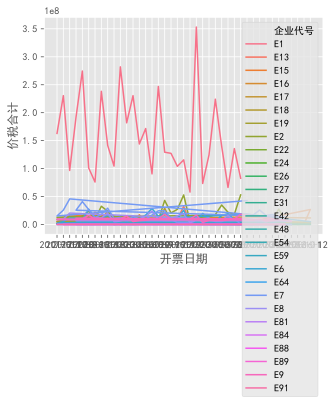

In [30]:
rank_a = rank[rank['信誉评级'] == 'A'] 

import seaborn as sns
import matplotlib.pyplot as plt

# 设置这些配置，图标才能正常显示
#%matplotlib inline # 让图表直接在 jupyter notebook 中展现出来
plt.rcParams['font.sans-serif'] = ['SimHei'] # 解决中文乱码问题
plt.rcParams['axes.unicode_minus'] = False # 解决负号无法正常显示的问题
%config InlineBackend.figure_format = 'svg' # 将图标设置成矢量图格式显示，会更清晰
plt.style.use('ggplot') # 设置绘图样式
#display(plt.style.available) # 风格

fig = plt.figure(figsize=(5,4), dpi=100)
sns_line_a=sns.lineplot(x="开票日期", y="价税合计",
                  hue="企业代号",data=rank_a,
                  markers=True, dashes=False)
sns_line_a

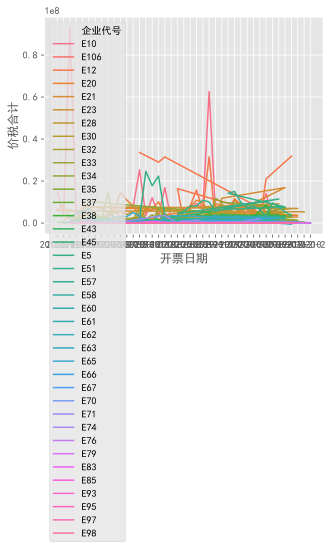

In [31]:
rank_b = rank[rank['信誉评级'] == 'B']
fig = plt.figure(figsize=(5,4), dpi=100)
sns_line_b=sns.lineplot(x="开票日期", y="价税合计",
                  hue="企业代号",data=rank_b,
                  markers=True, dashes=False)
sns_line_b

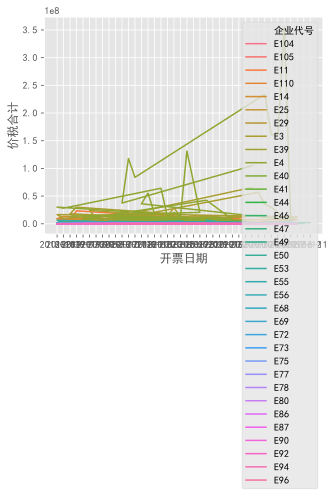

In [32]:
rank_c = rank[rank['信誉评级'] == 'C']
fig = plt.figure(figsize=(5,4), dpi=100)
sns_line_c=sns.lineplot(x="开票日期", y="价税合计",
                  hue="企业代号",data=rank_c,
                  markers=True, dashes=False)
sns_line_c

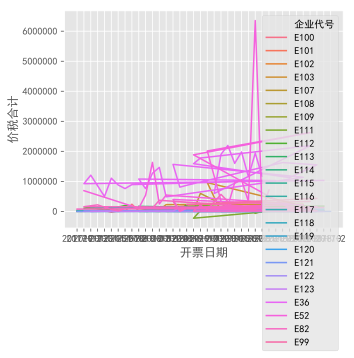

In [33]:
rank_d = rank[rank['信誉评级'] == 'D']
fig = plt.figure(figsize=(5,4), dpi=100)
sns_line_d=sns.lineplot(x="开票日期", y="价税合计",
                  hue="企业代号",data=rank_d,
                  markers=True, dashes=False)
sns_line_d

## 每个企业的进项，作废发票数，有效发票数

In [34]:
bill_outcome = df1_2[['企业代号','价税合计','发票状态']]

# 有效发票数
yes_bill_outcome = bill_outcome[bill_outcome['发票状态'] == '有效发票']
yes_bill_outcome = yes_bill_outcome.groupby('企业代号')['发票状态'].count()
yes_bill_outcome = yes_bill_outcome.reset_index()

# 作废发票数
no_bill_outcome = bill_outcome[bill_outcome['发票状态'] == '作废发票']
no_bill_outcome = no_bill_outcome.groupby('企业代号')['发票状态'].count()
no_bill_outcome = no_bill_outcome.reset_index()

# 进项有效，作废发票数汇总
bill_outcome = pd.merge(yes_bill_outcome,no_bill_outcome,on='企业代号',
                       how='left')
bill_outcome.rename(columns={'发票状态_x' : '进项有效发票数',
                            '发票状态_y' : '进项作废发票数'},
                            inplace=True)
bill_outcome.head()

,企业代号,进项有效发票数,进项作废发票数
0,E1,3249,192.0
1,E10,3860,237.0
2,E100,58,NaN
3,E101,16,NaN
4,E102,710,20.0


## 每个企业的销项作废发票数，有效发票数

In [35]:
bill_income = df1_3[['企业代号','价税合计','发票状态']]

# 有效发票数
yes_bill_income = bill_income[bill_income['发票状态'] == '有效发票']
yes_bill_income = yes_bill_income.groupby('企业代号')['发票状态'].count()
yes_bill_income = yes_bill_income.reset_index()

# 作废发票数
no_bill_income = bill_income[bill_income['发票状态'] == '作废发票']
no_bill_income = no_bill_income.groupby('企业代号')['发票状态'].count()
no_bill_income = no_bill_income.reset_index()

# 进项有效，作废发票数汇总
bill_income = pd.merge(yes_bill_income,no_bill_income,on='企业代号',
                      how='left')
bill_income.rename(columns={'发票状态_x' : '销项有效发票数',
                            '发票状态_y' : '销项作废发票数'},
                            inplace=True)
bill_income.head()

,企业代号,销项有效发票数,销项作废发票数
0,E1,7886,224.0
1,E10,516,52.0
2,E100,98,1.0
3,E101,32,31.0
4,E102,151,26.0


## 每个企业进项价,销项税合计

In [36]:
# 进项
outcome_sum = df1_2[['企业代号','价税合计']]
outcome_sum = outcome_sum.groupby('企业代号')['价税合计'].sum().reset_index()

# 销项
income_sum = df1_3[['企业代号','价税合计']]
income_sum = income_sum.groupby('企业代号')['价税合计'].sum().reset_index()

# 进项，销项汇总
outcome_income_sum = pd.merge(outcome_sum,income_sum,on='企业代号')
outcome_income_sum.rename(columns={'价税合计_x' : '进项价税合计',
                                  '价税合计_y' : '销项价税合计'},inplace=True)
outcome_income_sum.head()

,企业代号,进项价税合计,销项价税合计
0,E1,6.892694e+09,4.798812e+09
1,E10,6.478611e+06,3.806986e+08
2,E100,2.332302e+04,7.114892e+05
3,E101,5.315800e+04,7.259654e+05
4,E102,3.708884e+06,4.650110e+05


## 变量汇总

In [37]:
'''
字段为：企业代号，企业名称，信誉评级，是否违约，进项合计，销项合计，进项有效
发票数，进项作废发票数,销项有效发票数，进项作废发票数，成立时间，客户量
'''
import math
data = pd.merge(df1_1,live_time,on='企业代号')
data = pd.merge(data,customer,on='企业代号')
data = pd.merge(data,bill_outcome,on='企业代号')
data = pd.merge(data,bill_income,on='企业代号')
data = pd.merge(data,outcome_income_sum,on='企业代号')
data['利润'] = data['销项价税合计'] - data['进项价税合计']
data['生存年限'] = data['生存年限'].map(lambda x: int(x.replace('月','')))
data['生存年限'] = data['生存年限'].map(lambda x: math.ceil(x / 12))
data['收益率'] = (data['销项价税合计'] - data['进项价税合计']) / data['进项价税合计']
data['收益率'] = data['收益率'] / data['生存年限']
data.to_excel('../data/data.xlsx',encoding='utf8',index=False)

# LCR 模型，KMeans 聚类，对企业分类

## 提取 LCR 变量，建模 

In [38]:
data.head()

,企业代号,企业名称,信誉评级,是否违约,生存年限,客户数,进项有效发票数,进项作废发票数,销项有效发票数,销项作废发票数,进项价税合计,销项价税合计,利润,收益率
0,E1,***电器销售有限公司,A,否,3,352,3249,192.0,7886,224.0,6.892694e+09,4.798812e+09,-2.093882e+09,-0.101261
1,E2,***技术有限责任公司,A,否,4,1579,31435,721.0,11665,1042.0,1.717365e+08,6.947082e+08,5.229717e+08,0.761300
2,E3,***电子(中国)有限公司***分公司,C,否,4,135,4367,194.0,23688,385.0,5.752084e+07,6.827398e+08,6.252189e+08,2.717358
3,E4,***发展有限责任公司,C,否,4,26,521,37.0,2041,190.0,3.804074e+08,2.345631e+09,1.965223e+09,1.291525
4,E5,***供应链管理有限公司,B,否,3,33,2084,85.0,1005,55.0,2.320502e+08,2.427882e+08,1.073796e+07,0.015425


In [44]:
'''
LCR 模型变量选取
L 成立年限
C 客户数 
R 收益率 
'''
LCR = data[['生存年限','客户数','收益率']]
#LCR['生存年限'] = LCR['生存年限'].map(lambda x: int(x.replace('月','')))
LCR.head()

,生存年限,客户数,收益率
0,3,352,-0.101261
1,4,1579,0.761300
2,4,135,2.717358
3,4,26,1.291525
4,3,33,0.015425


In [45]:
'''
聚类模型对企业分类
'''
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=4)
kms.fit(LCR)
label = kms.labels_
label = pd.DataFrame(list(label))

# 把企业类别汇总到 data.xlsx，并保存为 new_data.xlsx
data['种类'] = label
data.to_excel('../data/data_Kmeans.xlsx')
data.head()

,企业代号,企业名称,信誉评级,是否违约,生存年限,客户数,进项有效发票数,进项作废发票数,销项有效发票数,销项作废发票数,进项价税合计,销项价税合计,利润,收益率,种类
0,E1,***电器销售有限公司,A,否,3,352,3249,192.0,7886,224.0,6.892694e+09,4.798812e+09,-2.093882e+09,-0.101261,0
1,E2,***技术有限责任公司,A,否,4,1579,31435,721.0,11665,1042.0,1.717365e+08,6.947082e+08,5.229717e+08,0.761300,3
2,E3,***电子(中国)有限公司***分公司,C,否,4,135,4367,194.0,23688,385.0,5.752084e+07,6.827398e+08,6.252189e+08,2.717358,0
3,E4,***发展有限责任公司,C,否,4,26,521,37.0,2041,190.0,3.804074e+08,2.345631e+09,1.965223e+09,1.291525,0
4,E5,***供应链管理有限公司,B,否,3,33,2084,85.0,1005,55.0,2.320502e+08,2.427882e+08,1.073796e+07,0.015425,0


## 聚类结果可视化

In [46]:
# 0 类型
kind_0 = data[data['种类'] == 0]
#kind_0['生存年限'] = kind_0['生存年限'].map(lambda x: int(x.replace('月','')))
kind_0 = kind_0[["生存年限","客户数","收益率"]].mean()
kind_0

生存年限      3.271186
客户数     103.262712
收益率      30.450275
dtype: float64

In [47]:
# 1 类型
kind_1 = data[data['种类'] == 1]
#kind_1['生存年限'] = kind_1['生存年限'].map(lambda x: int(x.replace('月','')))
kind_1 = kind_1[["生存年限","客户数","收益率"]].mean()
kind_1

生存年限       4.000000
客户数     7484.000000
收益率        0.411458
dtype: float64

In [48]:
# 2 类型
kind_2 = data[data['种类'] == 2]
#kind_2['生存年限'] = kind_2['生存年限'].map(lambda x: int(x.replace('月','')))
kind_2 = kind_2[["生存年限","客户数","收益率"]].mean()
kind_2

生存年限       2.000000
客户数        7.000000
收益率     4425.498777
dtype: float64

In [49]:
# 3 类型
kind_3 = data[data['种类'] == 3]
#kind_3['生存年限'] = kind_3['生存年限'].map(lambda x: int(x.replace('月','')))
kind_3 = kind_3[["生存年限","客户数","收益率"]].mean()
kind_3

生存年限       4.00000
客户数     2480.00000
收益率        0.49361
dtype: float64

In [50]:
# 雷达图
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.charts import Radar

value_0 = [
    list(kind_0.values)
]
value_1 = [
    list(kind_1.values)
]
value_2 = [
    list(kind_2.values)
]
value_3 = [
    list(kind_3.values)
]
c_schema = [
    {"name": "成立年限", "max": 5, "min": 0},
    {"name": "客户数", "max": 8500, "min": 0},
    {"name": "收益率", "max": 4425, "min": 0},
]
c = (
    Radar(init_opts=opts.InitOpts(theme=ThemeType.DARK))
    .add_schema(schema=c_schema, shape="circle")
    .add("0", value_0, color="#f9713c")
    .add("1", value_1, color="#b3e4a1")
    .add("2", value_2, color="#bd10e0")
    .add("3", value_3, color="#FFFF00")
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(title_opts=opts.TitleOpts(title="企业聚类结果"))
)
c.render('../output/聚类结果.html')
c.render_notebook()

# 建立 KNN 分类模型预测附件2企业等级

## 附件1最终数据作为训练集

In [107]:
data = data.fillna(0)

x_train = data.drop(columns=['企业代号','企业名称','信誉评级','是否违约','种类'])
y_train = data['信誉评级']

# 模型建立
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=2) # 当有一个新样本时，选取离他最近的 3 个，类别最多的，那新样本也属于这个类别
knn.fit(x_train,y_train)

# 预测准确度评估
an = knn.predict(x_train)
from sklearn.metrics import accuracy_score
score = accuracy_score(an, y_train)
score

0.7235772357723578

## 附件2处理为需要用到的数据

In [108]:
'''
每家公司的成立年限，第一张发票时间到最后一张发票时间的差值，以月为单位
'''
# 支出表生存年限
live_time2 = df2_2[['企业代号','开票日期']]
live_time2_min = live_time2.groupby('企业代号').min().reset_index()
live_time2_max = live_time2.groupby('企业代号').max().reset_index()
live_time2 = pd.merge(live_time2_max,live_time2_min,on='企业代号')
live_time2['生存年限1'] = live_time2['开票日期_x'] - live_time2['开票日期_y']

# 收入表生存年限
live_time3 = df2_3[['企业代号','开票日期']]
live_time3_min = live_time3.groupby('企业代号').min().reset_index()
live_time3_max = live_time3.groupby('企业代号').max().reset_index()
live_time3 = pd.merge(live_time3_max,live_time3_min,on='企业代号')
live_time3['生存年限2'] = live_time3['开票日期_x'] - live_time3['开票日期_y']

# 找出生存年限最大的值作为生存年限
live_time = pd.merge(live_time2,live_time3,on='企业代号')[['企业代号','生存年限1','生存年限2']]
x1 = list(live_time['生存年限1'])
x2 = list(live_time['生存年限2'])
x = []
for i in range(len(x1)):
    if x1[i] >= x2[i]:
        x.append(x1[i])
    else:
        x.append(x2[i])
company_id = pd.DataFrame(live_time['企业代号'])
x = pd.DataFrame(x,columns=['生存年限'])
live_time = company_id.join(x)

# 生存年限转为月份
live_time['生存年限'] = live_time['生存年限'].astype(str)
live_time['生存年限'] = live_time['生存年限'].str.split().str.get(0)
live_time['生存年限'] = live_time['生存年限'].map(lambda x: str(int(x) // 30) + '月')


'''
客户量：计算收入的发票数有多少
'''
customer = df2_2[['企业代号','购方单位代号','发票状态']]
customer = customer[customer['发票状态'] == '有效发票']
customer = customer.drop_duplicates(subset=['企业代号','购方单位代号'])
customer = customer.groupby('企业代号')['购方单位代号'].count().reset_index()
customer.rename(columns={'购方单位代号': '客户数'},inplace=True)


'''
每个企业的进项，作废发票数，有效发票数
'''
bill_outcome = df2_3[['企业代号','价税合计','发票状态']]

# 有效发票数
yes_bill_outcome = bill_outcome[bill_outcome['发票状态'] == '有效发票']
yes_bill_outcome = yes_bill_outcome.groupby('企业代号')['发票状态'].count()
yes_bill_outcome = yes_bill_outcome.reset_index()

# 作废发票数
no_bill_outcome = bill_outcome[bill_outcome['发票状态'] == '作废发票']
no_bill_outcome = no_bill_outcome.groupby('企业代号')['发票状态'].count()
no_bill_outcome = no_bill_outcome.reset_index()

# 进项有效，作废发票数汇总
bill_outcome = pd.merge(yes_bill_outcome,no_bill_outcome,on='企业代号',
                       how='left')
bill_outcome.rename(columns={'发票状态_x' : '进项有效发票数',
                            '发票状态_y' : '进项作废发票数'},
                            inplace=True)


'''
每个企业的销项作废发票数，有效发票数
'''
bill_income = df2_3[['企业代号','价税合计','发票状态']]

# 有效发票数
yes_bill_income = bill_income[bill_income['发票状态'] == '有效发票']
yes_bill_income = yes_bill_income.groupby('企业代号')['发票状态'].count()
yes_bill_income = yes_bill_income.reset_index()

# 作废发票数
no_bill_income = bill_income[bill_income['发票状态'] == '作废发票']
no_bill_income = no_bill_income.groupby('企业代号')['发票状态'].count()
no_bill_income = no_bill_income.reset_index()

# 进项有效，作废发票数汇总
bill_income = pd.merge(yes_bill_income,no_bill_income,on='企业代号',
                      how='left')
bill_income.rename(columns={'发票状态_x' : '销项有效发票数',
                            '发票状态_y' : '销项作废发票数'},
                            inplace=True)


'''
每个企业进项价,销项税合计
'''
# 进项
outcome_sum = df2_2[['企业代号','价税合计']]
outcome_sum = outcome_sum.groupby('企业代号')['价税合计'].sum().reset_index()

# 销项
income_sum = df2_3[['企业代号','价税合计']]
income_sum = income_sum.groupby('企业代号')['价税合计'].sum().reset_index()

# 进项，销项汇总
outcome_income_sum = pd.merge(outcome_sum,income_sum,on='企业代号')
outcome_income_sum.rename(columns={'价税合计_x' : '进项价税合计',
                                  '价税合计_y' : '销项价税合计'},inplace=True)


'''
变量汇总
'''
import math
data1 = pd.merge(df2_1,live_time,on='企业代号')
data1 = pd.merge(data1,customer,on='企业代号')
data1 = pd.merge(data1,bill_outcome,on='企业代号')
data1 = pd.merge(data1,bill_income,on='企业代号')
data1 = pd.merge(data1,outcome_income_sum,on='企业代号')
data1['利润'] = data1['销项价税合计'] - data1['进项价税合计']
data1['生存年限'] = data1['生存年限'].map(lambda x: int(x.replace('月','')))
data1['生存年限'] = data1['生存年限'].map(lambda x: math.ceil(x / 12))
data1['收益率'] = (data1['销项价税合计'] - data1['进项价税合计']) / data1['进项价税合计']
data1['收益率'] = data1['收益率'] / data['生存年限']
data1.to_excel('../data/data2.xlsx',encoding='utf8',index=False)

In [109]:
data1.head()

,企业代号,企业名称,生存年限,客户数,进项有效发票数,进项作废发票数,销项有效发票数,销项作废发票数,进项价税合计,销项价税合计,利润,收益率
0,E124,个体经营E124,2,52,15264,2147.0,15264,2147.0,9.650616e+08,9.921813e+08,2.711965e+07,0.009367
1,E125,个体经营E125,3,63,17776,2512.0,17776,2512.0,1.195105e+09,1.177813e+09,-1.729178e+07,-0.003617
2,E126,个体经营E126,3,143,515,18.0,515,18.0,6.503090e+08,1.340063e+08,-5.163027e+08,-0.198484
3,E127,个体经营E127,3,25,1424,26.0,1424,26.0,7.177467e+08,1.854773e+06,-7.158919e+08,-0.249354
4,E128,个体经营E128,3,7,3134,88.0,3134,88.0,2.646424e+08,1.078804e+07,-2.538543e+08,-0.319745


## 分类附件2的企业等级

In [110]:
# 分类
data1 = data1.fillna(0)
x_pre = data1.drop(columns=['企业代号','企业名称'])
y_pre = knn.predict(x_pre)

# 保存预测分类后数据
company_rank = data1[['生存年限','客户数','利润','收益率']]
y_pre = pd.DataFrame(y_pre)
company_rank['信誉等级'] = y_pre
company_rank.to_excel('../data/data2_company_rank.xlsx',index=False)

D:\programming\dev_env\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# 建立逻辑回归预测企业是否违规

In [111]:
data.head(3)

,企业代号,企业名称,信誉评级,是否违约,生存年限,客户数,进项有效发票数,进项作废发票数,销项有效发票数,销项作废发票数,进项价税合计,销项价税合计,利润,收益率,种类
0,E1,***电器销售有限公司,0,否,3,352,3249,192.0,7886,224.0,6.892694e+09,4.798812e+09,-2.093882e+09,-0.101261,0
1,E2,***技术有限责任公司,0,否,4,1579,31435,721.0,11665,1042.0,1.717365e+08,6.947082e+08,5.229717e+08,0.761300,3
2,E3,***电子(中国)有限公司***分公司,2,否,4,135,4367,194.0,23688,385.0,5.752084e+07,6.827398e+08,6.252189e+08,2.717358,0


In [112]:
data1['信誉评级'] = y_pre
data1.head(3)

,企业代号,企业名称,生存年限,客户数,进项有效发票数,进项作废发票数,销项有效发票数,销项作废发票数,进项价税合计,销项价税合计,利润,收益率,信誉评级
0,E124,个体经营E124,2,52,15264,2147.0,15264,2147.0,9.650616e+08,9.921813e+08,2.711965e+07,0.009367,0
1,E125,个体经营E125,3,63,17776,2512.0,17776,2512.0,1.195105e+09,1.177813e+09,-1.729178e+07,-0.003617,0
2,E126,个体经营E126,3,143,515,18.0,515,18.0,6.503090e+08,1.340063e+08,-5.163027e+08,-0.198484,0


## 附件1处理后的数据作为训练集

In [113]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

# 文本转数值
le = LabelEncoder()
label = le.fit_transform(data['信誉评级'])
data['信誉评级'] = label

# 自变量，因变量
x_tr = data[['信誉评级','生存年限','客户数','进项有效发票数','进项作废发票数',
          '销项有效发票数','销项作废发票数','进项价税合计','销项价税合计',
          '利润','收益率']]
y_tr = data['是否违约']

# 数据标准化
x_tr = StandardScaler().fit_transform(x_tr)

# 建立模型
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_tr,y_tr)

# 查看准确度
y_pr = model.predict(x_tr)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pr,y_tr)
display(score)

# 系数查看
display(model.coef_) # 各项系数
display(model.intercept_) # 截距

0.975609756097561

array([[ 2.92737687, -0.2467177 , -0.18522085, -0.35848909, -0.4271272 ,
        -0.25076316, -0.61315989, -0.05568042, -0.15229733, -0.14260966,
        -0.47935196]])

array([-3.55405893])

## 附件2数据作为预测

In [115]:
# 文本转数值
le = LabelEncoder()
label = le.fit_transform(data1['信誉评级'])
data1['信誉评级'] = label

# 自变量，因变量
x_pr = data1[['信誉评级','生存年限','客户数','进项有效发票数','进项作废发票数',
          '销项有效发票数','销项作废发票数','进项价税合计','销项价税合计',
          '利润','收益率']]

# 数据标准化
x_pr = StandardScaler().fit_transform(x_pr)

# 预测是否违约
y_pr1 = model.predict(x_pr)

data1['是否违约'] = pd.DataFrame(y_pr1)
data1.to_excel('../data/data2_logit.xlsx')

In [116]:
data1

,企业代号,企业名称,生存年限,客户数,进项有效发票数,进项作废发票数,销项有效发票数,销项作废发票数,进项价税合计,销项价税合计,利润,收益率,信誉评级,是否违约
0,E124,个体经营E124,2,52,15264,2147.0,15264,2147.0,9.650616e+08,9.921813e+08,2.711965e+07,0.009367,0,否
1,E125,个体经营E125,3,63,17776,2512.0,17776,2512.0,1.195105e+09,1.177813e+09,-1.729178e+07,-0.003617,0,否
2,E126,个体经营E126,3,143,515,18.0,515,18.0,6.503090e+08,1.340063e+08,-5.163027e+08,-0.198484,0,否
3,E127,个体经营E127,3,25,1424,26.0,1424,26.0,7.177467e+08,1.854773e+06,-7.158919e+08,-0.249354,0,否
4,E128,个体经营E128,3,7,3134,88.0,3134,88.0,2.646424e+08,1.078804e+07,-2.538543e+08,-0.319745,1,否
5,E129,个体经营E129,3,796,5928,398.0,5928,398.0,4.243838e+08,1.048130e+08,-3.195708e+08,-0.188256,0,否
6,E130,个体经营E130,3,14,3123,128.0,3123,128.0,1.257319e+08,8.553994e+07,-4.019197e+07,-0.079916,1,否
7,E131,个体经营E131,3,818,6527,550.0,6527,550.0,2.649774e+08,1.383711e+08,-1.266063e+08,-0.119450,0,否
8,E132,个体经营E132,3,99,5050,109.0,5050,109.0,2.430543e+08,7.503902e+07,-1.680153e+08,-0.172817,1,否
9,E133,个体经营E133,3,9,1599,46.0,1599,46.0,1.443638e+08,4.305358e+07,-1.013102e+08,-0.175443,1,否
